# Lecture 12: Hard-Margin SVM and General Linear Classifiers
***

<img src="figs/cogs.jpg" width=1100 height=50>

### Problem 1: Finding the Maximum Margin Hyperplane Geometrically
***

Suppose you have the following training examples: 

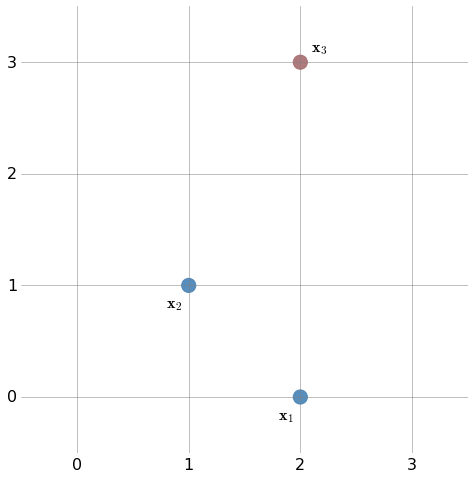

In [74]:
prob1plot()

**Q**: Find the maximum margin hyperplane of the form ${\bf w}^T{\bf x} + b = 0$ such that the support vectors lie on ${\bf w}^T{\bf x} + b = \pm 1$

**Q**: Which training examples are support vectors? 

**Q**: What is the maximal margin, $M$, in this example? 

### Problem 2: Finding the Maximum Margin Hyperplane Geometrically
***

Suppose instead you have the following training examples: 

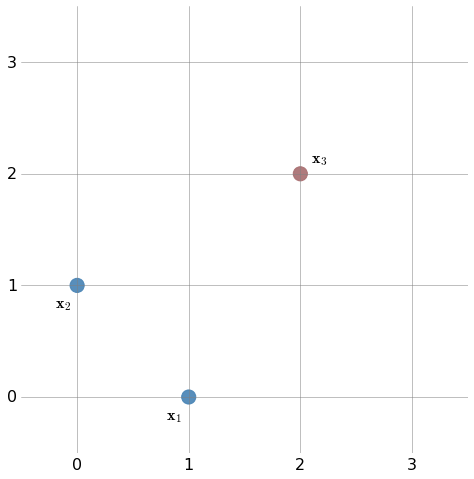

In [78]:
prob2plot()

**Q**: Find the maximum margin hyperplane of the form ${\bf w}^T{\bf x} + b = 0$ such that the support vectors lie on ${\bf w}^T{\bf x} + b = \pm 1$

**Q**: Which training examples are support vectors? 

**Q**: What is the maximal margin, $M$, in this example? 

### Problem 3: Logistic Regression vs Support Vector Machine 
***

We've seen that Logistic Regresion and Linear Support Vector Machines both produce decision boundaries of the form ${\bf w}^T{\bf x} + b = 0$. 

**Q**: What are the primary differences between LogReg and SVM? How are their decision boundaries different? 

### Problem 4: Naive Bayes as a Linear Classifier 
***

Consider the SPAM vs. HAM problem in the case of binary feature vectors (i.e. ${\bf x}$ is a vector of length $\left| V \right|$ with each component $x_k = 1$ if word $i$ is present in the email and $x_k = 0$ if word $k$ is not present).  The decision rule for Naive Bayes is as follows:  

$~~~~~~$${\bf x}$ is SPAM if <br>
$~~~~~~$$p(SPAM ~|~ {\bf x}) \geq p(HAM ~|~ {\bf x})$<br>
$~~~~~~$else ${\bf x}$ is HAM

**Q**:  Is Naive Bayes a linear classifier in this setting?  Does it form a decision boundary of the form ${\bf w}^T{\bf x} + b = 0$?  If so, what are the weights and what is the bias? 

### Problem 5: A More Linear Algebraic Derivation of the Hard-Margin SVM 
***

**Note**: This is not really a problem.  Read if you're comfortable with linear algebra and want a different perspective on the derivation of the Hard-Margin SVM. 

Consider the figure below corresponding to Problem 2 above. 

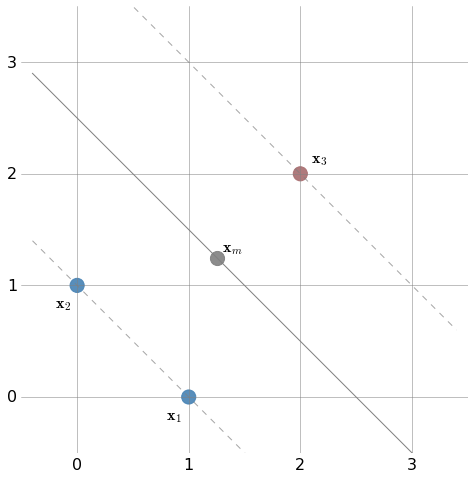

In [3]:
prob2sol()

Remember that the weights ${\bf w}$ and bias ${\bf b}$ for a particular hard-margin SVM decision boundary are unique only up to a constant scaling.  Let's redo the geometric derivation of an SVM from a geometric perspective, but this time I'm going to assume that the weight vector is a unit vector and call it $\hat{\bf w}$.  For consistency, I'll call the bias term associated with the unit length weights vector ${\hat b}$

Let $d$ be the perpendicular distance from the decision boundary ($DB$) to the origin ($O$).  This distance is shown by the green chord in the following picture. 

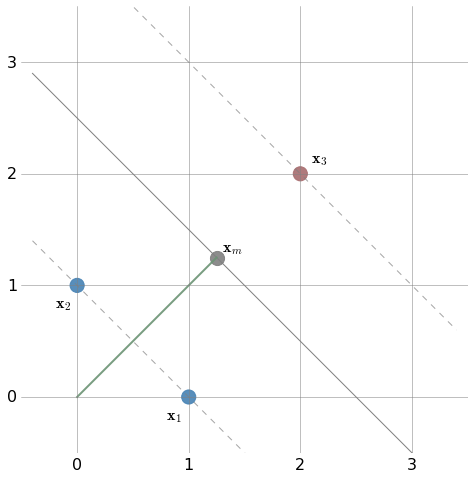

In [11]:
plotfig2()

Since $\hat{\bf w}$ points orthogonal to $DB$, we can write the vector ${\bf x}_m$ as ${\bf x}_m = d\hat{\bf w}$ (remember that $\hat{\bf w}$ is a unit vector, so scaling it by $d$ gives something with magnitude $d$). Now, we know that ${\bf x}_m$ lies on $DB$, so it must satisfy the equation $\hat{\bf w}^T{\bf x} + \hat{b} = 0$.  Plugging ${\bf x}_m$ into this equation gives 

<br> 

$$
\hat{\bf w}^T{\bf x} + \hat{b} = 0 
\quad \Leftrightarrow \quad 
\hat{\bf w}^T(d \hat{\bf w}) + \hat{b} = 0 
\quad \Leftrightarrow \quad 
d\hat{\bf w}^T\hat{\bf w} + \hat{b} = 0 
\quad \Leftrightarrow \quad 
d\|\hat{\bf w}\|^2 + \hat{b} = 0 
\quad \Leftrightarrow \quad 
-\hat{b} = d
$$

<br> 

where here the last step follows from the assumption that $\hat{\bf w}$ is a unit vector.   What this says is that **in the case where** ${\bf w}$ **is a unit vector** the negative of the bias gives you the perpendicular distance that $DB$ is away from the origin.  In this case we can truly interpret the bias as an intercept, in the sense that making $\hat{b}$ bigger moves the decision boundary farther away from the origin. 

Now, under this same assumption that $\hat{\bf w}$ is a unit vector, what are the equations of the support vector boundaries? We can answer this question by representing a vector that we know lies on the support vector boundary and then plugging it into the decision function $\hat{\bf w}^T{\bf x} + \hat{b}$.  A convenient point to check is the point ${\bf x}_3$ shown in the picture.  We know that ${\bf x}_3$ is parallel to $\hat{\bf w}$ and has magnitude $d + M$ (where $M$ is again the margin).  But we've already said that $-\hat{b} = d$, so we can say that the magnitude of ${\bf x}_3$ is $M - \hat{b}$, and write ${\bf x}_3 = (M - \hat{b})\hat{\bf w}$.  Plugging this into the decision function gives 

<br>

$$
\hat{\bf w}^T{\bf x}_3 + \hat{b} = \hat{\bf w}^T(M - \hat{b})\hat{\bf w} + \hat{b} 
= M - \hat{b} + \hat{b} = M 
$$


<br>

So the positive support vector boundary is given by $\hat{\bf w}^T{\bf x} + \hat{b} = M$.  If you work out the same math for a support vector on the negative support vector boundary you'll find that those support vectors similarly satisfy $\hat{\bf w}^T{\bf x} + \hat{b} = -M$. So, the two support vector boundaries are described by 

<br>

$$
\hat{\bf w}^T{\bf x} + \hat{b} = \pm M
$$

<br>

To summarize, in the case that the weight vector ${\bf w}$ is a unit vector, the negative bias tells you the perpendicular distance that the decision boundary lies from the origin, and the support vector boundaries are described by $\hat{w}^T{\bf x} + \hat{b} = \pm M$.  

You might surmise from this that the value of $\hat{w}^T{\bf x} + \hat{b}$ for an arbitrary ${\bf x}$ tells you the perpendicular distance from the point ${\bf x}$ to the decision boundary.  And you'd be correct.  To see this, consider a point that lives a distance 2 margins beyond the decision boundary along the vector $\hat{\bf w}$ passing through the origin.  Such an ${\bf x}$ can be written as ${\bf x} = (d + 2M)\hat{\bf w} = (2M - \hat{b})\hat{\bf w}$.  Plugging this into the decision function yields 

<br>

$$
\hat{\bf w}^T{\bf x} + \hat{b} = \hat{\bf w}^T(2M - \hat{b})\hat{\bf w} + \hat{b} 
= 2M - \hat{b} + \hat{b} = 2M 
$$


<br>

just as we expect.  But what about the more complicated case when a point of interest ${\bf x}$ does not lie on the line along ${\hat{\bf w}}$ passing through the origin?  Consider the following picture where I've placed a point ${\bf x}$ 2 margins away from the decision boundary and then some unspecified amount in the direction of a vector perpendicular to $\hat{\bf w}$ (i.e. parallel to the decision boundary itself)

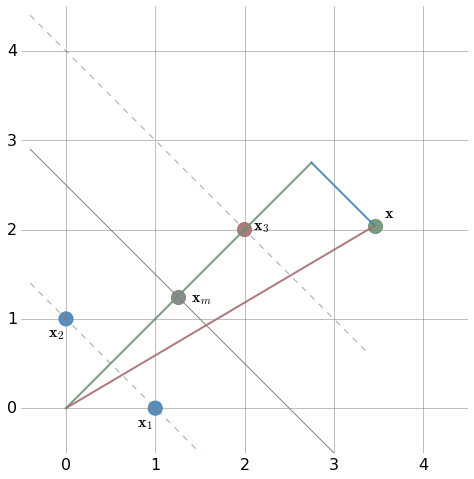

In [12]:
plotfig3()

The vector ${\bf x}$ can be written as a sum of a vector parallel to $\hat{\bf w}$ (shown by the green line) and a vector perpendicular to $\hat{\bf w}$ (shown by the blue line).  Let's assume that the perpendicular distance from ${\bf x}$ to the origin is $d + 2M$ or equivalently $2M - \hat{b}$ (this is the length of the green line).  Further let's represent the vector perpendicular to $\hat{\bf w}$ by ${\bf u}$.  Then we can write ${\bf x}$ as 

<br>

$$
{\bf x} = (2M - \hat{b})\hat{\bf w} + {\bf u} 
$$

<br>

Plugging this into the decision function we have 

<br>

$$
\hat{\bf w}^T{\bf x} + \hat{b} = \hat{\bf w}^T[(2M - \hat{b})\hat{\bf w} + {\bf u}] + \hat{b} 
 = (2M-\hat{b})\hat{\bf w}^T\hat{\bf w} + \hat{\bf w}^T{\bf u} + \hat{b} = (2M - \hat{b}) + 0 + \hat{b} = 2M  
$$


<br>

Notice that in the second to last step the $0$ comes from the fact that $\hat{\bf w}$ and ${\bf u}$ are perpendicular, and the dot product of perpendicular vectors is $0$.  What this illustrates is that (again, for the case when we assume $\hat{\bf w}$ is a unit vector) regardless of the position of ${\bf x}$, the decision function $\hat{\bf w}^T{\bf x} + \hat{b}$ will return the orthogonal distance from the point to the decision boundary. 

OK, this seems **really nice**!  Unfortunately, in the derivation of the hard-margin SVM we assumed that ${\bf w}$ and $\hat{b}$ were scaled such that the support vector boundaries were described by the equations ${\bf w}^T{\bf x} + b = \pm 1$.  Scaling the parameters in the unit vector case above is going to throw off our interpretations of distances, but in a way that is **not that bad**! 

We already know that for the unit vector weights the equations of the support vector boundaries are 

<br>

$$
\hat{\bf w}^T{\bf x} + \hat{b} = \pm M 
$$

<br>

To get the usual equations for the support vector boundaries we divide both sides of this equation by $M$ and then absorb the $M$ into the coefficients.  Mathematically, 

<br>

$$
\left(\frac{\hat{\bf w}}{M}\right)^T{\bf x} + \frac{\hat{b}}{M} = \pm 1 \quad \Rightarrow \quad
{\bf w}^T{\bf x} + b = \pm 1 \quad \textrm{ where }  {\bf w} = \frac{\hat{\bf w}}{M} \quad \textrm{and} \quad b = \frac{\hat{b}}{M}
$$

<br>

So what does this mean geometrically now when we take a point ${\bf x}$ and plug it into the decision function with the newly scaled weights?  Well, if we do this for some point ${\bf x}$ and get say $5$ to pop out, i.e. 

<br>

$$
{\bf w}^T{\bf x} + b = 5
$$

<br>

we can interpret the distances by implicitly putting in the scalings involving the unit vector weights, i.e. 

<br>

$$
{\bf w}^T{\bf x} + b = 5 
\quad \Rightarrow \quad 
\left(\frac{\hat{\bf w}}{M}\right)^T{\bf x} + \frac{\hat{b}}{M} = 5
\quad \Rightarrow \quad 
\hat{\bf w}^T{\bf x} + \hat{b} = 5M 
$$

<br>

In other words, plugging in ${\bf x}$ and getting ${\bf w}^T{\bf x} + b = 5$ tells us that the perpendicular distance from ${\bf x}$ to the decision boundary is **FIVE MARGINS**.  Similarly, if we plugged in a point ${\bf x}$ and got ${\bf w}^T{\bf x} + b = -\frac{1}{2}$ this would tell us that the perpendicular distance from ${\bf x}$ to the decision boundary is **ONE-HALF MARGIN** from the decision boundary towards the origin.   

**The Punchline**: The value of the decision function ${\bf w}^T{\bf x} + b$ for a given point ${\bf x}$ under the standard SVM scaling of the parameters tell you the number of margins the point is from the decision boundary. 

I encourage you to go back to the specific examples in this notebook and verify that this all works out for examples with actual numbers! 

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

### Helper Functions
***

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def prob1plot():
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    X = np.array([[1,1], [2,0], [2,3]])
    y = np.array([-1,-1,1])
    colors = [mycolors["blue"] if yi==-1 else mycolors["red"] for yi in y]
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111) 
    plt.scatter(X[:,0], X[:,1], color=colors, s=200, alpha=0.9)
    ax.xaxis.grid(True, color="gray", ls='-')
    ax.yaxis.grid(True, color="gray", ls='-')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.text(1.8,-0.2,r"${\bf x}_1$", fontsize=16)
    ax.text(0.8,0.8,r"${\bf x}_2$", fontsize=16)
    ax.text(2.1,3.1,r"${\bf x}_3$", fontsize=16)
    plt.xticks([0, 1,2,3], fontsize=16)
    plt.yticks([0, 1,2,3], fontsize=16)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    plt.xlim([-0.5,3.5])
    plt.ylim([-0.5,3.5])
    
def prob2plot():
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    X = np.array([[0,1], [1,0], [2,2]])
    y = np.array([-1,-1,1])
    colors = [mycolors["blue"] if yi==-1 else mycolors["red"] for yi in y]
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111) 
    plt.scatter(X[:,0], X[:,1], color=colors, s=200, alpha=0.9)
    ax.xaxis.grid(True, color="gray", ls='-')
    ax.yaxis.grid(True, color="gray", ls='-')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.text(0.8,-0.2,r"${\bf x}_1$", fontsize=16)
    ax.text(-0.2,0.8,r"${\bf x}_2$", fontsize=16)
    ax.text(2.1,2.1,r"${\bf x}_3$", fontsize=16)
    plt.xticks([0, 1,2,3], fontsize=16)
    plt.yticks([0, 1,2,3], fontsize=16)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    plt.xlim([-0.5,3.5])
    plt.ylim([-0.5,3.5])

def prob1sol(): 
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    X = np.array([[1,1], [2,0], [2,3]])
    y = np.array([-1,-1,1])
    colors = [mycolors["blue"] if yi==-1 else mycolors["red"] for yi in y]
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111) 
    plt.scatter(X[:,0], X[:,1], color=colors, s=200, alpha=0.9)
    plt.scatter([3./2], [2.], color='gray', s=200, alpha=0.9)
    ax.xaxis.grid(True, color="gray", ls='-')
    ax.yaxis.grid(True, color="gray", ls='-')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.text(1.8,-0.2,r"${\bf x}_1$", fontsize=16)
    ax.text(0.8,0.8,r"${\bf x}_2$", fontsize=16)
    ax.text(2.1,3.1,r"${\bf x}_3$", fontsize=16)
    ax.text(1.6,2.1,r"${\bf x}_m$", fontsize=16)
    plt.xticks([0, 1,2,3], fontsize=16)
    plt.yticks([0, 1,2,3], fontsize=16)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    x = np.linspace(-0.4,3.4,10)
    plt.plot(x, 11./4 - x/2.0, color="gray")
    plt.plot(x, 11./4 -5./4 - x/2.0, color="gray", ls='--', alpha=0.75)
    plt.plot(x, 11./4 +5./4 - x/2.0, color="gray", ls='--', alpha=0.75)
    plt.xlim([-0.5,3.5])
    plt.ylim([-0.5,3.5])
    
def prob2sol(): 
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    X = np.array([[1,0], [0,1], [2,2]])
    y = np.array([-1,-1,1])
    colors = [mycolors["blue"] if yi==-1 else mycolors["red"] for yi in y]
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111) 
    plt.scatter(X[:,0], X[:,1], color=colors, s=200, alpha=0.9)
    plt.scatter([5./4], [5./4], color='gray', s=200, alpha=0.9)
    ax.xaxis.grid(True, color="gray", ls='-')
    ax.yaxis.grid(True, color="gray", ls='-')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.text(0.8,-0.2,r"${\bf x}_1$", fontsize=16)
    ax.text(-0.2,0.8,r"${\bf x}_2$", fontsize=16)
    ax.text(2.1,2.1,r"${\bf x}_3$", fontsize=16)
    ax.text(1.3,1.3,r"${\bf x}_m$", fontsize=16)
    plt.xticks([0, 1,2,3], fontsize=16)
    plt.yticks([0, 1,2,3], fontsize=16)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    x = np.linspace(-0.4,3.4,10)
    plt.plot(x, 5./2 - x, color="gray")
    plt.plot(x, 5./2 + 3./2 - x, color="gray", ls='--', alpha=0.7)
    plt.plot(x, 5./2 - 3./2 - x, color="gray", ls='--', alpha=0.7)
    plt.xlim([-0.5,3.5])
    plt.ylim([-0.5,3.5])
    
    
def plotfig2(): 
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    X = np.array([[1,0], [0,1], [2,2]])
    y = np.array([-1,-1,1])
    colors = [mycolors["blue"] if yi==-1 else mycolors["red"] for yi in y]
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111) 
    plt.scatter(X[:,0], X[:,1], color=colors, s=200, alpha=0.9)
    plt.scatter([5./4], [5./4], color='gray', s=200, alpha=0.9)
    ax.xaxis.grid(True, color="gray", ls='-')
    ax.yaxis.grid(True, color="gray", ls='-')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.text(0.8,-0.2,r"${\bf x}_1$", fontsize=16)
    ax.text(-0.2,0.8,r"${\bf x}_2$", fontsize=16)
    ax.text(2.1,2.1,r"${\bf x}_3$", fontsize=16)
    ax.text(1.3,1.3,r"${\bf x}_m$", fontsize=16)
    plt.xticks([0, 1,2,3], fontsize=16)
    plt.yticks([0, 1,2,3], fontsize=16)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    x = np.linspace(-0.4,3.4,10)
    plt.plot(x, 5./2 - x, color="gray")
    plt.plot(x, 5./2 + 3./2 - x, color="gray", ls='--', alpha=0.7)
    plt.plot(x, 5./2 - 3./2 - x, color="gray", ls='--', alpha=0.7)
    plt.plot([0, 5./4], [0, 5./4], color=mycolors["green"], alpha = 0.9, lw=2)
    plt.xlim([-0.5,3.5])
    plt.ylim([-0.5,3.5])
    
def plotfig3(): 
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373"}
    X = np.array([[1,0], [0,1], [2,2]])
    y = np.array([-1,-1,1])
    colors = [mycolors["blue"] if yi==-1 else mycolors["red"] for yi in y]
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111) 
    plt.scatter(X[:,0], X[:,1], color=colors, s=200, alpha=0.9)
    plt.scatter([5./4], [5./4], color='gray', s=200, alpha=0.9)
    
    w = np.array([2./3, 2./3])
    M = 1./np.linalg.norm(w)
    z = np.array([5./4, 5./4]) + 2*M*w/np.linalg.norm(w)
    u = np.array([2./3, -2./3])
    u = u / np.linalg.norm(u)
    v = z + u 
    
    plt.scatter(v[0], v[1], color=mycolors["green"], s=200, alpha=0.9)
    
    ax.xaxis.grid(True, color="gray", ls='-')
    ax.yaxis.grid(True, color="gray", ls='-')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.text(0.8,-0.2,r"${\bf x}_1$", fontsize=16)
    ax.text(-0.2,0.8,r"${\bf x}_2$", fontsize=16)
    ax.text(2.1,2.0,r"${\bf x}_3$", fontsize=16)
    ax.text(1.4,1.2,r"${\bf x}_m$", fontsize=16)
    ax.text(v[0]+.1,v[1]+.1,r"${\bf x}$", fontsize=16)
    plt.xticks([0, 1,2,3,4], fontsize=16)
    plt.yticks([0, 1,2,3,4], fontsize=16)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    x = np.linspace(-0.4,3.4,10)
    plt.plot(x, 5./2 - x, color="gray")
    plt.plot(x, 5./2 + 3./2 - x, color="gray", ls='--', alpha=0.7)
    plt.plot(x, 5./2 - 3./2 - x, color="gray", ls='--', alpha=0.7)
    plt.plot([0, z[0]], [0, z[1]], color=mycolors["green"], alpha = 0.9, lw=2)
    plt.plot([z[0], v[0]], [z[1], v[1]], color=mycolors["blue"], alpha = 0.9, lw=2)
    plt.plot([0, v[0]], [0, v[1]], color=mycolors["red"], alpha = 0.9, lw=2)
    plt.xlim([-0.5,4.5])
    plt.ylim([-0.5,4.5])

from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")